Summarize and present NanoPrePro parameters

In [1]:
from types import SimpleNamespace
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
import json, os

# paths
path_workdir = Path("/home/b05b01002/HDD/project_nanoprep_re")
path_output = Path("./output")
os.makedirs(path_output, exist_ok=True)

# NanoPrePro report file name template
path_report = lambda wildcards: \
    path_workdir / f"outputs/NanoPreP/mprof_nanoprep/{wildcards.beta}/{wildcards.name}_{wildcards.accuracy}/report.html"

# wildcards
names = [
    "egr-109-bio1",
    "egr-109-bio2",
    "lch-109-bio1",
    "lch-109-bio2",
    "ptr-109-bio1",
    "ptr-109-bio2",
    "ptr-111-bio1",
    "ont-10x-human",
    "ont-visium-mouse",
    "mouse-retina-subset1",
    "mouse-retina-subset2"
]
accuracies = [
    "sup",
    "hac",
    "fast",
    "pre-called"
]
betas = [f"beta{i}" for i in ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0", "1.5", "2.0"]]

In [2]:
params = []
for beta in betas:
    for name in names:
        if name in ["mouse-retina-subset1", "mouse-retina-subset2"]:
            accuracies_tmp = accuracies[3:]
        else:
            accuracies_tmp = accuracies[:3]
        for accuracy in accuracies_tmp:
            wildcards = SimpleNamespace(beta=beta, name=name, accuracy=accuracy)
            fpath = path_report(wildcards)
            if not fpath.is_file():
                print(f"missing {fpath}")
                continue
            with open(fpath) as handle_in:
                data = json.load(handle_in)
            params.append({
                "beta": beta,
                "name": name,
                "accuracy": accuracy,
                "pid5": data["params"]["pid5"],
                "pid3": data["params"]["pid3"],
                "isl5": data["params"]["isl5"][-1],
                "isl3": -data["params"]["isl3"][0],
                "plen5": len(data["params"]["p5_sense"]),
                "plen3": len(data["params"]["p3_sense"]) - 6
            })

In [3]:
data = pd.DataFrame(params)
data["chemistry"] = data["name"].map({
    "egr-109-bio1": "R9",
    "egr-109-bio2": "R9",
    "lch-109-bio1": "R9",
    "lch-109-bio2": "R9",
    "ptr-109-bio1": "R9",
    "ptr-109-bio2": "R9",
    "ptr-111-bio1": "R9",
    "ont-10x-human": "R10",
    "ont-visium-mouse": "R10",
    "mouse-retina-subset1": "R10",
    "mouse-retina-subset2": "R10"
})
data.loc[data["accuracy"] == "pre-called", "accuracy"] = "sup"

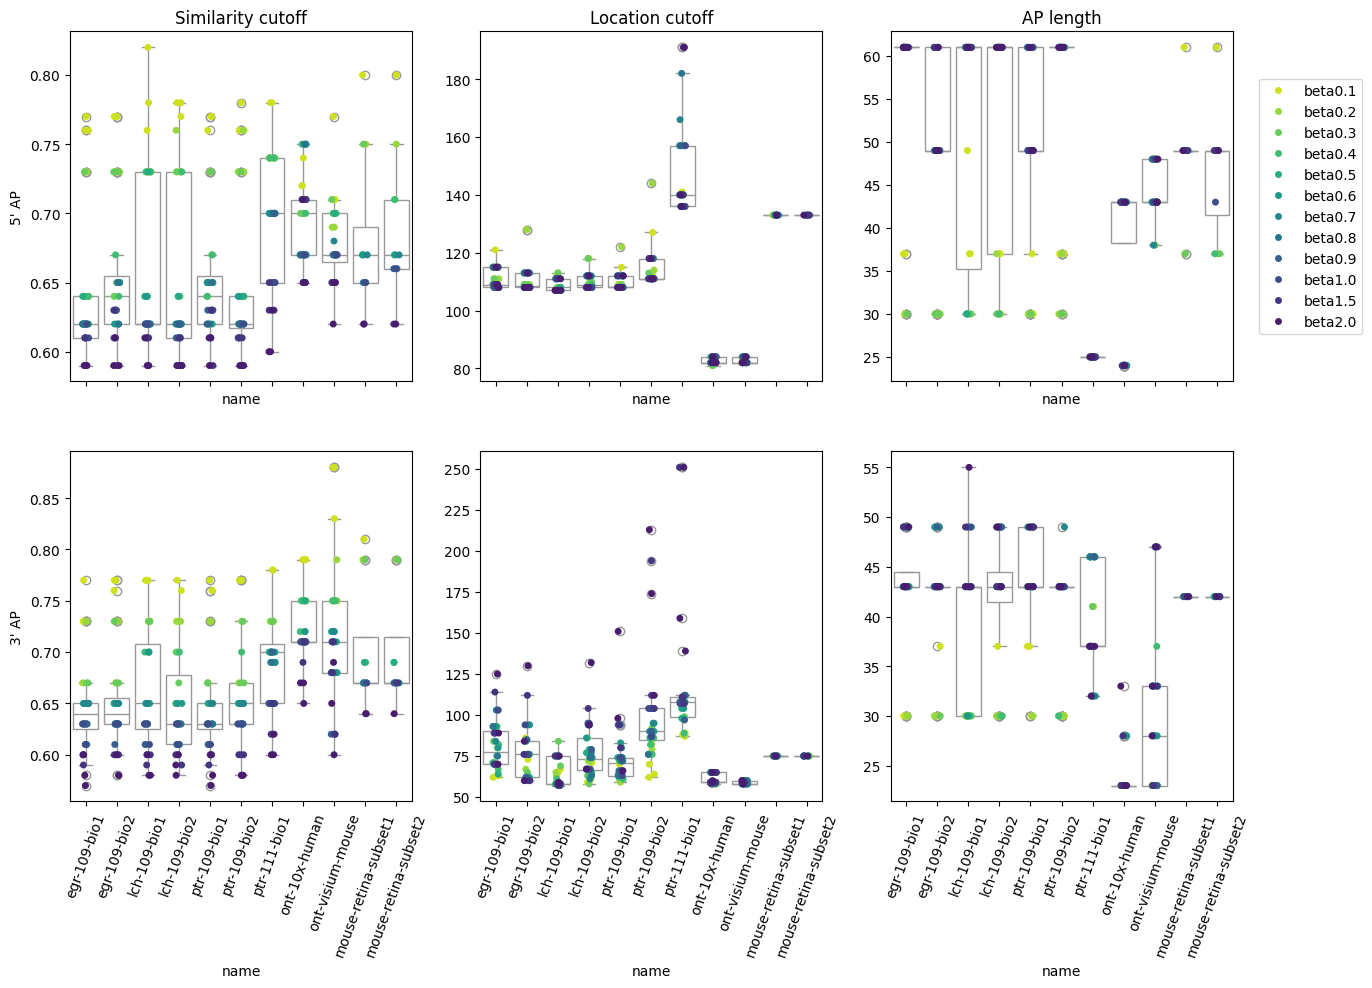

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
param_i_j = [
    ("pid5", 0, 0),
    ("isl5", 0, 1),
    ("plen5", 0, 2),
    ("pid3", 1, 0),
    ("isl3", 1, 1),
    ("plen3", 1, 2)
]
for y, i, j in param_i_j:
    sns.boxplot(
        data,
        x="name",
        y=y,
        color="white",
        legend=False,
        ax=axes[i][j]
    )
    sns.stripplot(
        data,
        x="name",
        y=y,
        hue="beta",
        palette="viridis_r",
        legend=((i, j) == (0, 2)),
        ax=axes[i][j]
    )

axes[0][0].set_title("Similarity cutoff")
axes[0][1].set_title("Location cutoff")
axes[0][2].set_title("AP length")
axes[0][0].tick_params(axis="x", labelbottom=False)
axes[0][1].tick_params(axis="x", labelbottom=False)
axes[0][2].tick_params(axis="x", labelbottom=False)
axes[1][0].tick_params(axis="x", rotation=70)
axes[1][1].tick_params(axis="x", rotation=70)
axes[1][2].tick_params(axis="x", rotation=70)
axes[0][0].set_ylabel("5' AP")
axes[0][1].set_ylabel("")
axes[0][2].set_ylabel("")
axes[1][0].set_ylabel("3' AP")
axes[1][1].set_ylabel("")
axes[1][2].set_ylabel("")
axes[0][2].legend(loc="center right", bbox_to_anchor=(1.4, 0.5))
fig.savefig("output/nanoprepro-params.svg")

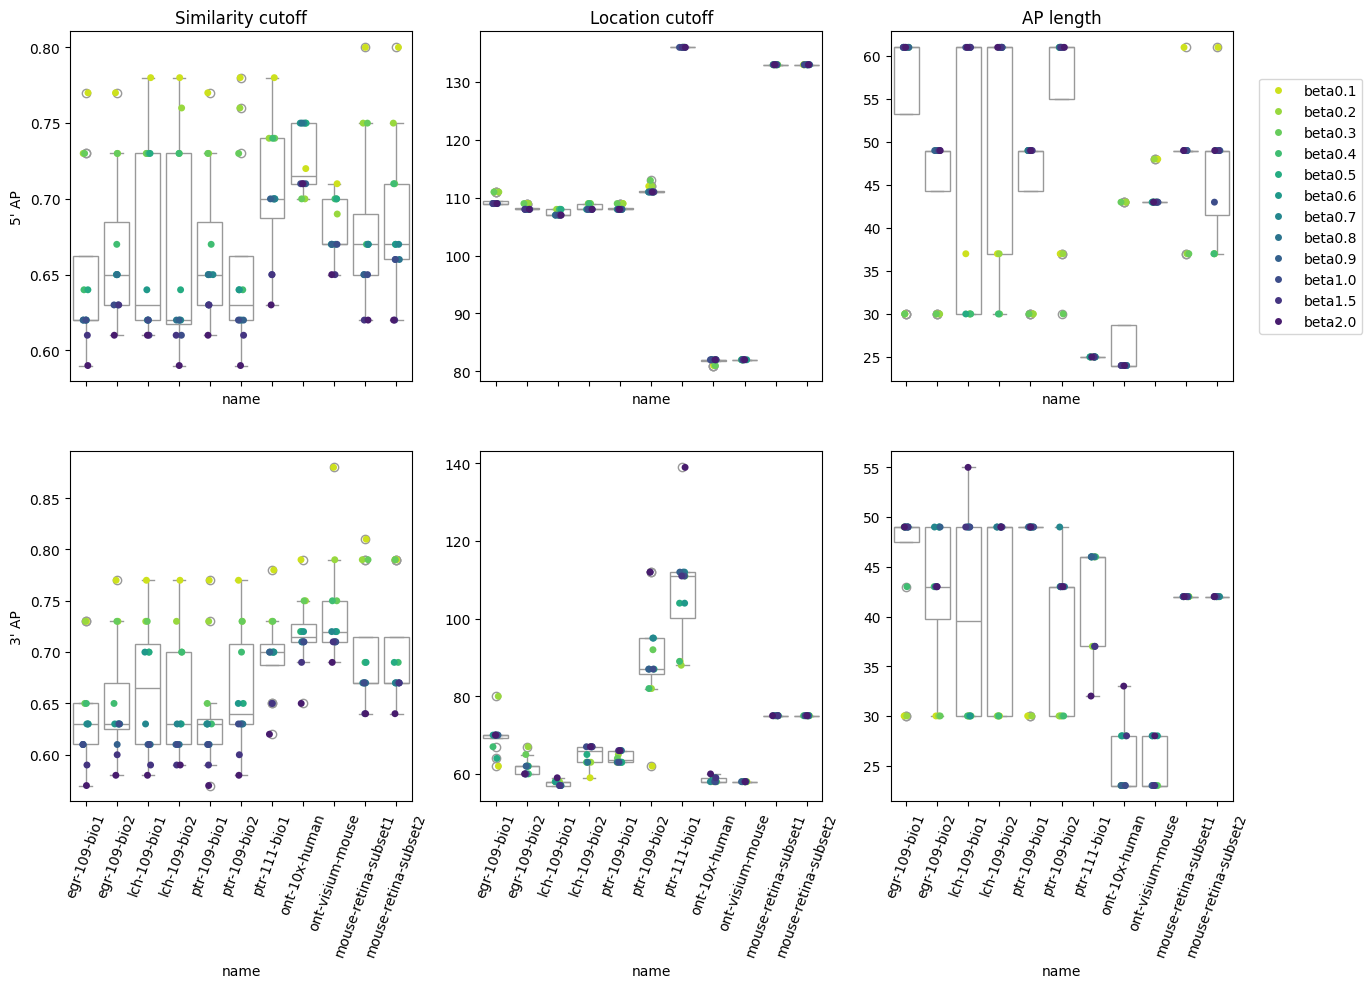

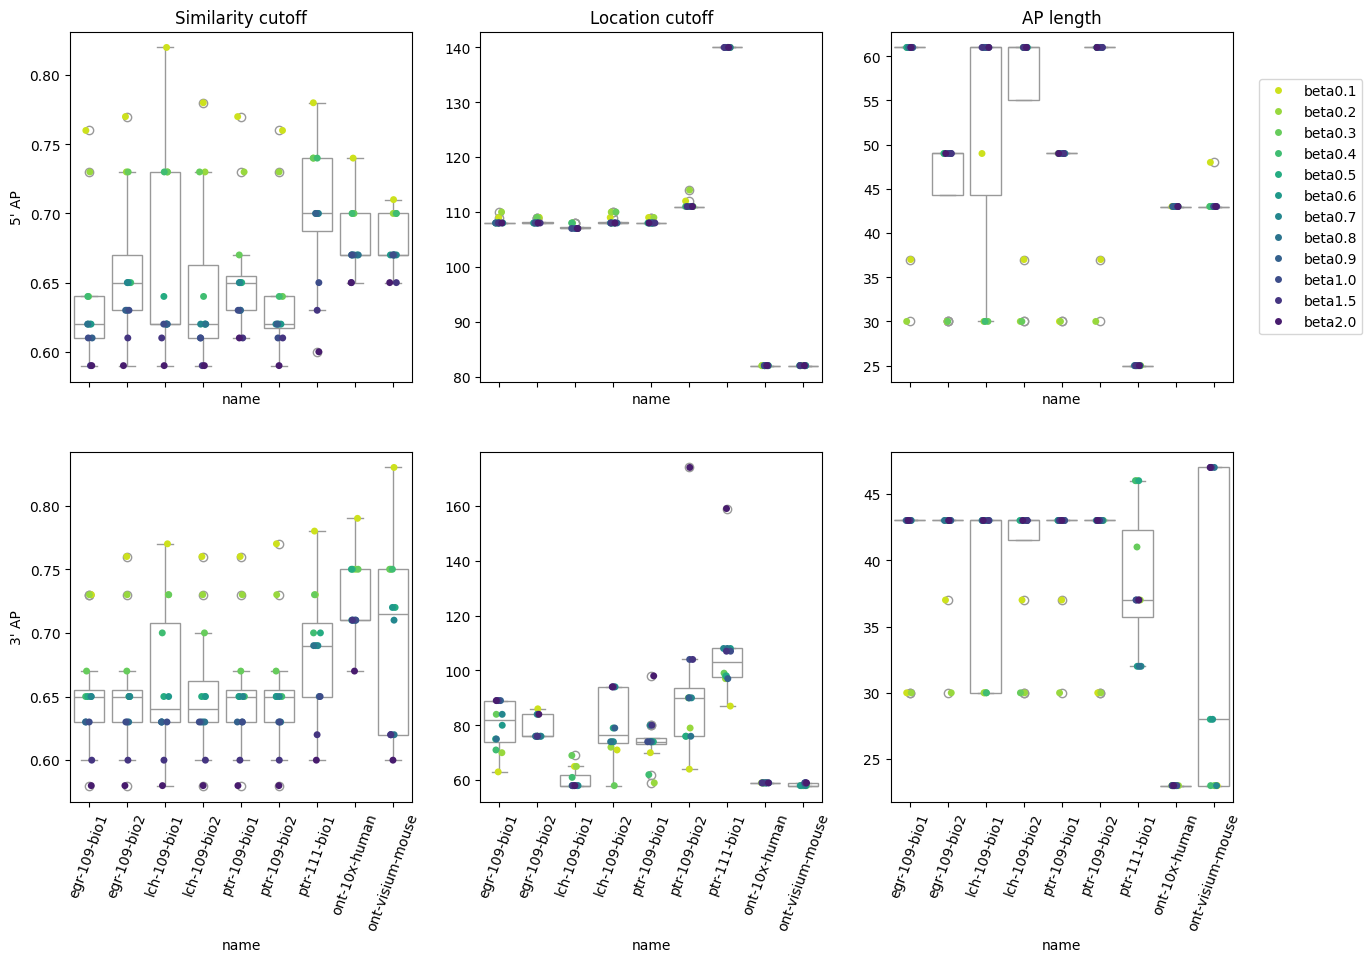

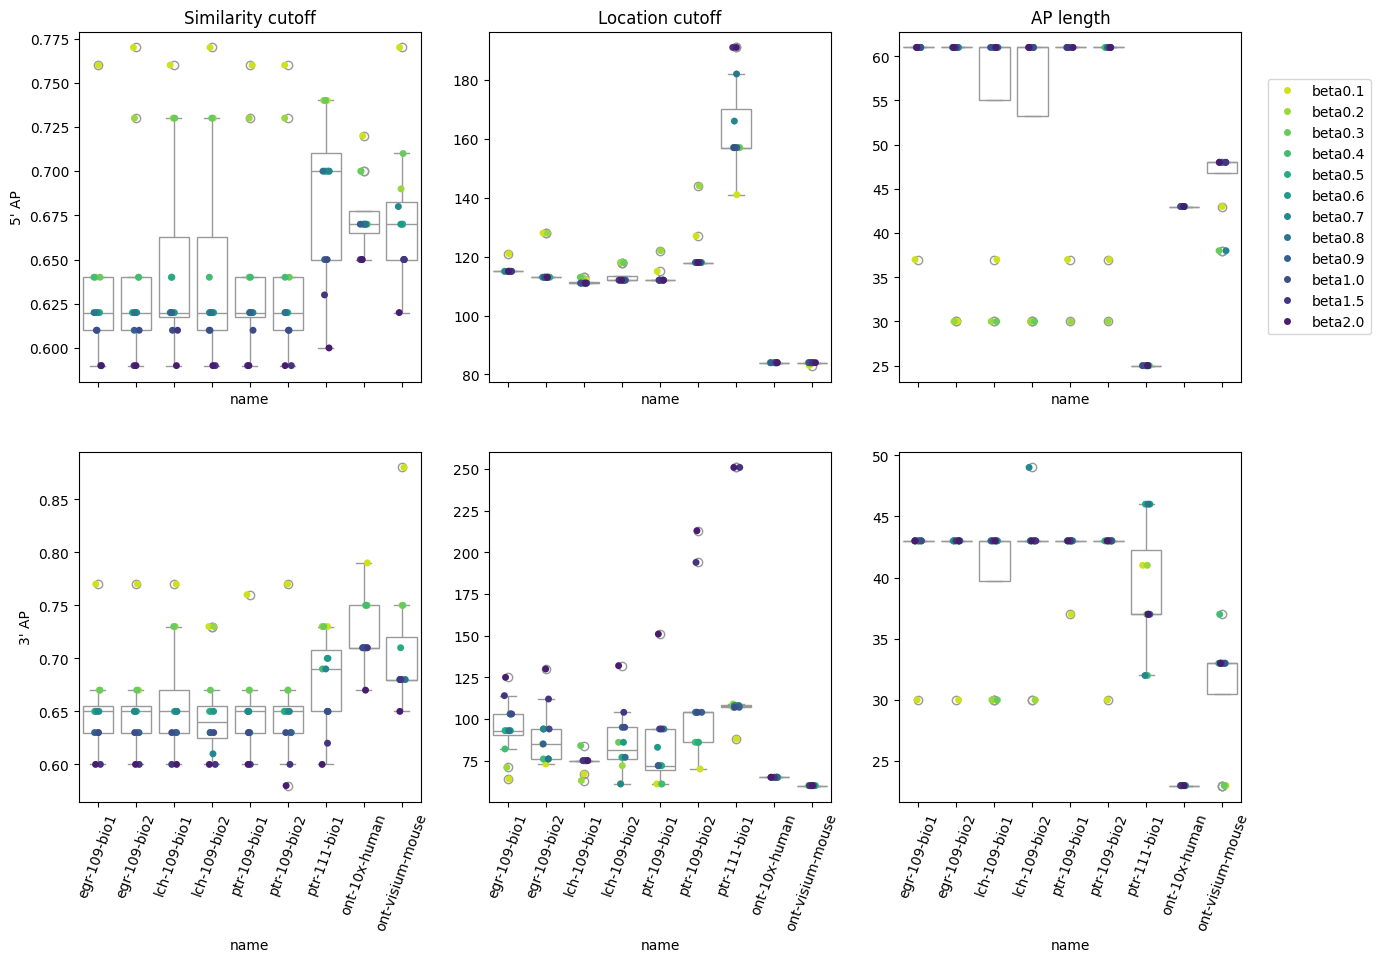

In [5]:
for accuracy in ["sup", "hac", "fast"]:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    param_i_j = [
        ("pid5", 0, 0),
        ("isl5", 0, 1),
        ("plen5", 0, 2),
        ("pid3", 1, 0),
        ("isl3", 1, 1),
        ("plen3", 1, 2)
    ]
    for y, i, j in param_i_j:
        sns.boxplot(
            data[data["accuracy"] == accuracy],
            x="name",
            y=y,
            color="white",
            legend=False,
            ax=axes[i][j]
        )
        sns.stripplot(
            data[data["accuracy"] == accuracy],
            x="name",
            y=y,
            hue="beta",
            palette="viridis_r",
            legend=((i, j) == (0, 2)),
            ax=axes[i][j]
        )

    axes[0][0].set_title("Similarity cutoff")
    axes[0][1].set_title("Location cutoff")
    axes[0][2].set_title("AP length")
    axes[0][0].tick_params(axis="x", labelbottom=False)
    axes[0][1].tick_params(axis="x", labelbottom=False)
    axes[0][2].tick_params(axis="x", labelbottom=False)
    axes[1][0].tick_params(axis="x", rotation=70)
    axes[1][1].tick_params(axis="x", rotation=70)
    axes[1][2].tick_params(axis="x", rotation=70)
    axes[0][0].set_ylabel("5' AP")
    axes[0][1].set_ylabel("")
    axes[0][2].set_ylabel("")
    axes[1][0].set_ylabel("3' AP")
    axes[1][1].set_ylabel("")
    axes[1][2].set_ylabel("")
    axes[0][2].legend(loc="center right", bbox_to_anchor=(1.4, 0.5))
    fig.savefig(f"output/nanoprepro-params-{accuracy}.svg")